# Q-1

Evaluate your model's performance with cross validation and using different metrics.


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings(action="ignore")

pd.options.display.max_columns = None

In [2]:
titanic = pd.read_csv("titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic["Sex_"]=pd.get_dummies(titanic["Sex"], drop_first=True)
titanic.groupby(["Embarked"])["PassengerId"].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [6]:
titanic["EmbarkedC"]=titanic["Embarked"].replace("C",1)
titanic["EmbarkedC"].replace("S",0,inplace=True)
titanic["EmbarkedC"].replace("Q",0,inplace=True)
titanic["EmbarkedS"]=titanic["Embarked"].replace("S",1)
titanic["EmbarkedS"].replace("Q",0,inplace=True)
titanic["EmbarkedS"].replace("C",0,inplace=True)
titanic["EmbarkedQ"]=titanic["Embarked"].replace("Q",1)
titanic["EmbarkedQ"].replace("S",0,inplace=True)
titanic["EmbarkedQ"].replace("C",0,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_,EmbarkedC,EmbarkedS,EmbarkedQ
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.0,1.0,0.0


In [49]:
titanic.dropna(subset=['Age', 'Embarked'],inplace=True)

In [50]:
titanic["Sib/age"] = titanic["SibSp"]*titanic["Age"]

In [51]:
X = titanic[["Pclass","Sex_","Age","Parch","Sib/age","Fare"]]
Y = titanic["Survived"]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465,stratify=Y_)

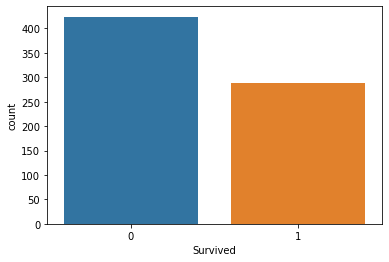

In [53]:
sns.countplot(titanic.Survived);

In [54]:
print("Number of data points in training set:  {}  ".format(len(X_train)))
print("Number of targets in training set    :  {}\n".format(len(y_train)))

print("Number of data points in test set    :  {}  ".format(len(X_test)))
print("Number of targets in test set        :  {}  ".format(len(y_test)))

Number of data points in training set:  569  
Number of targets in training set    :  569

Number of data points in test set    :  143  
Number of targets in test set        :  143  


In [55]:
print("Proportion of '0' in all data     : %{:.0f} ".format(len(Y[Y==0])/len(Y)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))

Proportion of '0' in all data     : %60 
Proportion of '0' in training set : %60 
Proportion of '0' in test set     : %59 


In [56]:
log_reg_ = LogisticRegression()
log_reg_.fit(X_train, y_train)

LogisticRegression()

In [57]:
train_accuracy = log_reg_.score(X_train, y_train)
test_accuracy = log_reg_.score(X_test, y_test)

pred_train = log_reg_.predict(X_train)
pred_test = log_reg_.predict(X_test)

print('Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy on Train Data : 0.79
Accuracy on Test Data  : 0.82


In [58]:
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

In [59]:
pieces = kf.split(X)

for num, (train_index, test_index) in enumerate(pieces):
    print("No.{} Train set size : {}".format(num+1,len(train_index)))
    print("No.{} Test set size     : {}".format(num+1,len(test_index)))
    print('-'*28, "\n")

No.1 Train set size : 569
No.1 Test set size     : 143
---------------------------- 

No.2 Train set size : 569
No.2 Test set size     : 143
---------------------------- 

No.3 Train set size : 570
No.3 Test set size     : 142
---------------------------- 

No.4 Train set size : 570
No.4 Test set size     : 142
---------------------------- 

No.5 Train set size : 570
No.5 Test set size     : 142
---------------------------- 



In [ ]:
from sklearn.metrics import mean_squared_error

model2 = LogisticRegression()

pieces = kf.split(X)
score_list = []

for i, (train_indeks, test_indeks) in enumerate(pieces):
    X_train, y_train = X["train_indeks], [train_indeks]
    X_test, y_test = X[test_indeks], y[test_indeks]
    
    model2.fit(X_train, y_train)
    
    prediction = model2.predict(X_test)
    
    score = model.score(X_test, y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.3f}".format(i+1, score))
    print("-"*23, "\n")

In [77]:
from sklearn.model_selection import cross_validate, cross_val_score

log_reg_model = LogisticRegression()

cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=Y,
                    cv=5,
                    return_train_score=True,
                   )

print('Train Scores :', cv['train_score'], sep = '\n')
print("-"*50)
print('Test Scores     :', cv['test_score'], sep = '\n')

Train Scores :
[0.80140598 0.79261863 0.79824561 0.79649123 0.79824561]
--------------------------------------------------
Test Scores     :
[0.74125874 0.82517483 0.77464789 0.76760563 0.79577465]


In [78]:
print('Mean score of train set : ', cv['train_score'].mean())
print('Mean score of test set  : ', cv['test_score'].mean())

Mean score of train set :  0.7974014121419543
Mean score of test set  :  0.7808923470895303


In [88]:
cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=Y,
                    cv=10,
                    return_train_score=True,
                    scoring = ['accuracy', 'precision', 'r2',"recall"]
                   )

In [151]:
print('Train Set Mean Accuracy  : {:.2f}  '.format(cv['train_accuracy'].mean()))
print('Train Set Mean R-square  : {:.2f}  '.format(cv['train_r2'].mean()))
print('Train Set Mean Precision : {:.2f}'.format(cv['train_precision'].mean()))
print('Train Set Mean recall : {:.2f}\n'.format(cv['train_recall'].mean()))

print('Test Set Mean Accuracy   : {:.2f}  '.format(cv['test_accuracy'].mean()))
print('Test Set Mean R-square   : {:.2f}  '.format(cv['test_r2'].mean()))
print('Test Set Mean Precision  : {:.2f}  '.format(cv['test_precision'].mean()))
print('Train Set Mean recall : {:.2f}\n'.format(cv['test_recall'].mean()))


Train Set Mean Accuracy  : 0.80  
Train Set Mean R-square  : 0.15  
Train Set Mean Precision : 0.77
Train Set Mean recall : 0.72

Test Set Mean Accuracy   : 0.79  
Test Set Mean R-square   : 0.11  
Test Set Mean Precision  : 0.76  
Train Set Mean recall : 0.70



# Q-2

Determine the model with the most appropriate parameters by hyperparameter tuning.


# -----Grid Search-----

In [123]:
from sklearn.model_selection import GridSearchCV

In [140]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

In [141]:
grid_cv = GridSearchCV(estimator=log_reg_,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X, Y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [142]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)


Best Parameters :  {'C': 0.1, 'penalty': 'l2'}
Best Score      :  0.7866784037558686


In [152]:
results = grid_cv.cv_results_

df = pd.DataFrame(results)
df.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002987,0.000774,0.000000,0.000000,1e-05,l1,"{'C': 1e-05, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,0.018350,0.004281,0.004092,0.000829,1e-05,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.583333,0.569444,0.732394,0.690141,0.619718,0.647887,0.633803,0.647887,0.661972,0.647887,0.643447,0.044989,10
2,0.002092,0.000538,0.000000,0.000000,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
3,0.021343,0.004250,0.003691,0.000898,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.583333,0.583333,0.718310,0.746479,0.605634,0.647887,0.676056,0.661972,0.661972,0.661972,0.654695,0.050719,9
4,0.001895,0.000537,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15


In [144]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df.head()

,param_penalty,param_C,mean_test_score
9,l2,0.1,0.786678
11,l2,1,0.786620
13,l2,10,0.785211
15,l2,100,0.785211
17,l2,1000,0.785211


According to results the best score is "l2,01,0,79"

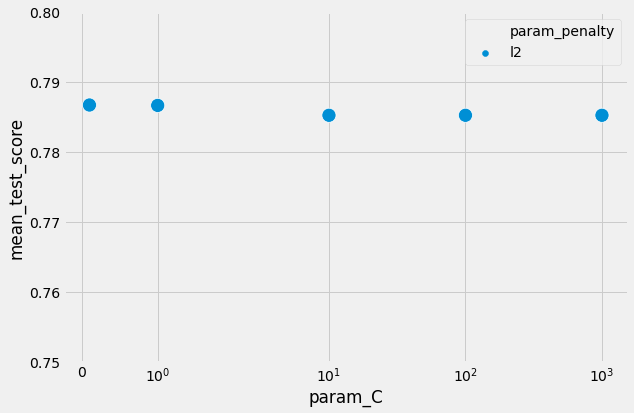

In [145]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:5], s=200)
plt.xscale('symlog')
plt.ylim((0.75,0.8))

plt.show()

# ------Random Search------

In [169]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2',"elasticnet"]
             }

In [170]:
from sklearn.model_selection import RandomizedSearchCV

rs_cv = RandomizedSearchCV(estimator=log_reg_,
                           param_distributions = parameters,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )

rs_cv.fit(X, Y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=111, scoring='precision')

In [174]:
print("Best parameters      : ", rs_cv.best_params_, "\n")

print("Best precision value : ", rs_cv.best_score_)

Best parameters      :  {'penalty': 'l2', 'C': 0.1} 

Best precision value :  0.7802014652014652


In [173]:
results_rs = rs_cv.cv_results_

df_rs = pd.DataFrame(results_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)

df_rs.head()

,param_penalty,param_C,mean_test_score
8,l2,0.1,0.780201
7,l2,1,0.764031
6,l2,0.0001,0.692752
0,l1,100,NaN
1,elasticnet,0.1,NaN
